# MTH4000 Programming in Python I - Lab 4
Dr Matthew Lewis and Prof. Thomas Prellberg

## Exercises

In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Comparing the Arithmetic, Harmonic, and Geometric Means

In the lecture, we saw how to define a function computing the average (also called the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean)) of a sequence of numbers $x_1,x_2,\ldots,x_n$:

$$\frac1n\sum_{k=1}^nx_k$$

(Note that the below is written slightly different than in the lecture.)

In [65]:
def arithmetic_mean(x): 
    "Compute the average of the values in the sequence x." 
    n=len(x)
    return sum(x)/n


#### Exercise 1.a:

Define two functions computing the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean):

 $$\frac n{\sum\limits_{k=1}^n\dfrac1{x_k}}\:,$$

and the [geometric mean](https://en.wikipedia.org/wiki/Geometric_mean):

$$\sqrt[n]{\prod_{k=1}^nx_k}\:,$$

of a sequence of positive numbers $x_1,x_2,\ldots,x_n$. 

(Remember that you can access individual entries of a list `L` by their index `i` by writing `L[i]`.)

In [66]:
import math
def geometric_mean(x):
    k=1
    for i in x:
        k*=i
    return pow(k, 1/len(x))
   



In [67]:
import math

def harmonic_mean(x): 
    add = 0
    for i in x:
        add = add+1/i

    return len(x)/add


#### Exercise 1.b: 

With numerical experimentation (i.e. by plugging in a few sequences of numbers), compare the sizes of these three means. Which one seems biggest, which one smallest?

In [68]:
x=[1,2,3,4,5,6,7,8,9,10]

print(geometric_mean(x))
print(harmonic_mean(x))
print(arithmetic_mean(x))


4.528728688116765
3.414171521474055
5.5


The arithmetic mean always seems largest, the harmonic mean smallest.

### Exercise 2: Modifying Plots with Linear Transformations

The code below defines two lists, `x` and `y`:

In [69]:
x=[1,4,-1]
y=[0,-2,3]

If each of these lists corresponds to a single three-dimensional vector, then for a pair of values $a , b \in\mathbb{R}$, we can compute a list corresponding to the vector $ax+by$ as follows:

In [70]:
a=3
b=2

[a*x[i]+b*y[i] for i in range(len(x))]

[3, 8, 3]

#### Exercise 2.a:

Write a function `linear_combination` which takes any two lists, `x` and `y`, and any two floats `a` and `b`, and returns the list corresponding to the vector $ax+by$.

In [71]:
x = (1,2,3)
y = (4,5,6)
a = 5
b = 2
def linear_combination(x,y,a,b):
    return [a*x[i]+b*y[i] for i in range(len(x))]
print(linear_combination(x,y,a,b))    

[13, 20, 27]


The code below plots a circle centred at the origin.

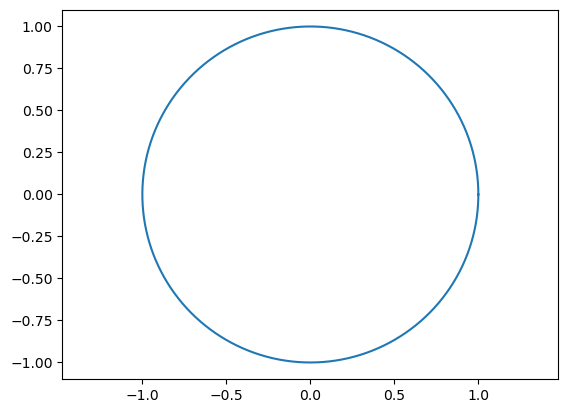

In [72]:
import numpy as np
import math
x=[np.cos(2*i*np.pi/1000) for i in range(1001)]
y=[np.sin(2*i*np.pi/1000) for i in range(1001)]

plt.plot(x,y)
plt.gca().axis('equal')
plt.show()

Apply your function `linear_combination` to the list of y-values in the `plot` function to deform this circle into an ellipse.  You should use values $a=0.8$ and $b=0.3$.  **Note:  It is not necessary to change the values of the lists `x` and `y`.**

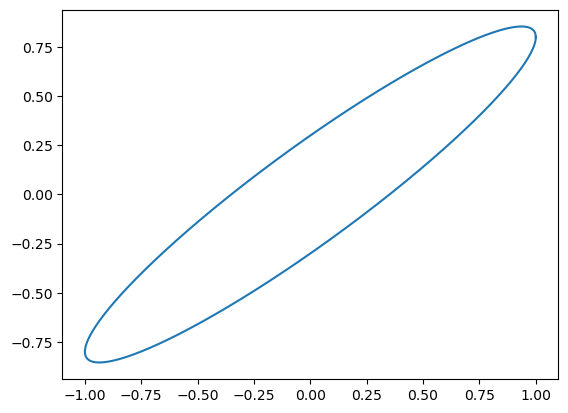

In [81]:
x=[np.cos(2*i*np.pi/1000) for i in range(1001)]
y=[np.sin(2*i*np.pi/1000) for i in range(1001)]
a=0.8
b=0.3
z=linear_combination(x,y,a,b)
plt.plot(x,z)


#### Exercise 2.b:

The code below plots a figure of a stretched-out smiley face.

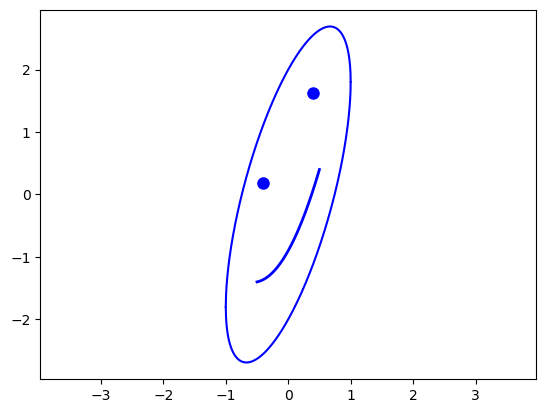

In [82]:
x1=np.linspace(-1,1,1000) # Used as x-values in the first two plots
x2=np.linspace(-0.5,0.5,1000) # Used as x-values in the third plot
x3=[-0.4,0.4] # Used as x-values in the fourth plot

plt.plot(x1,1.8*x1+2*(1-x1**2)**0.5,color='blue') # upper head
plt.plot(x1,1.8*x1-2*(1-x1**2)**0.5,color='blue') # lower head
plt.plot(x2,1.6*(x2**2)+1.8*x2-0.9,linewidth=2,color='blue') #smile
plt.plot(x3,[0.18,1.62],'o',markersize=8,color='blue') # eyes

plt.axis('equal')
plt.show()

Copy-and-paste this code into the box below, and modify it by applying the `linear_combination` function to the y-values in each plot, with $a=-0.9$ and $b=0.5$.  

**Hint: You will need to use the corresponding x-values each time you call the function, but the x-values themselves must remain unchanged.**

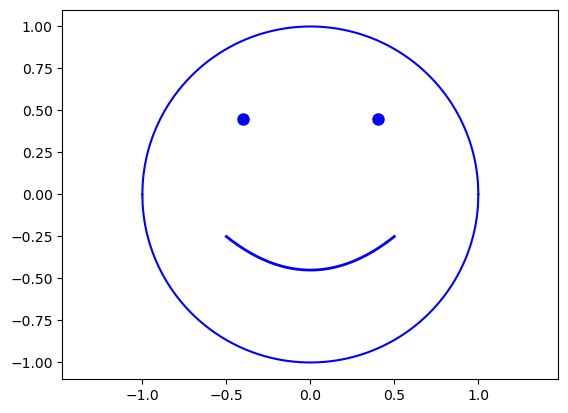

In [89]:
x1=np.linspace(-1,1,1000) # Used as x-values in the first two plots

a=-0.9
b=0.5
y=1.8*x1+2*(1-x1**2)**0.5
z=linear_combination(x1,y,a,b)
plt.plot(x1,z,color='blue') # upper head


y=1.8*x1-2*(1-x1**2)**0.5
z=linear_combination(x1,y,a,b)
plt.plot(x1,z,color='blue') # lower head


x2=np.linspace(-0.5,0.5,1000) # Used as x-values in the third plot

y=1.6*(x2**2)+1.8*x2-0.9
z=linear_combination(x2,y,a,b)
plt.plot(x2,z,linewidth=2,color='blue')


x3=[-0.4,0.4] # Used as x-values in the fourth plot
y=[0.18,1.62]
z=linear_combination(x3,y,a,b)
plt.plot(x3,z,'o',markersize=8,color='blue')

plt.axis('equal')
plt.show()    
    
    
    








### Exercise 3: Series Summation made Easier with Functions

Now that we have introduced functions, we can also simplify the code from previous weeks considerably. Consider for example your work on computing the [Riemann Zeta function](https://en.wikipedia.org/wiki/Riemann_zeta_function):

$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$ 

You already simplified your code considerably by using variable assignment, list comprehension, and the `sum` function, writing code like the following to compute the $100^{th}$ partial sum of the series for $\zeta(2)$.

In [90]:
s=2
print(sum([1/n**s for n in range(1,101)]))

1.6349839001848923


But if I asked you to now do this computation for the $n^{th}$ partial sum of the series of $\zeta(s)$ for several values of $n$ and $s$, you would not want to repeatedly type the same bit of code (as you will likely have done last week). So let us define a function instead.

#### Exercise 3.a:

Write a function, `zeta_sum` that accepts a numerical value `s` and an integer `N`, and returns the value of the partial sum of the Riemann Zeta function with `N` terms.

In [91]:
s=1
N=100
def zeta_sum(s,N):
    return sum([1/n**s for n in range(1,N)])
    



In [ ]:
# Exercise 3.b:

Using the function you have just defined, compute the $1000^{th}$, $2000^{th}$ and $3000^{th}$ partial sums for $s=2,4,6$, and compare against the exact values of $\zeta(s)$.

In [96]:

s=2
N=1000
print(zeta_sum(s,N))
s=2
N=2000
print(zeta_sum(s,N))
s=2
N=4000
print(zeta_sum(s,N))
print(np.pi**2/6)
s=4
N=1000
print(zeta_sum(s,N))
s=4
N=2000
print(zeta_sum(s,N))
s=4
N=4000
print(zeta_sum(s,N))
print(np.pi**4/90)
s=6
N=1000
print(zeta_sum(s,N))
s=6
N=2000
print(zeta_sum(s,N))
s=6
N=4000
print(zeta_sum(s,N))
print(np.pi**6/945)

1.6439335666815615
1.644433941827396
1.6446840355956318
1.6449340668482264
1.0823232333773058
1.0823232336694422
1.0823232337059312
1.082323233711138
1.017343061984441
1.017343061984441
1.017343061984441
1.017343061984449


### Exercise 4: Computing the slope of a secant to a curve

The secant of a function $f$ at two values $x_1$ and $x_2$ is the straight line passing through the points $(x_1,f(x_1))$ and $(x_2,f(x_2))$. It has slope 

$$\frac{f(x_1)-f(x_2)}{x_1-x_2}\;.$$

#### Exercise 4.a: 

First, we must remind ourselves of the role of lambda functions in Python.  A function can be defined with the `lambda` keyword, without having to go through the normal process of using `def` and `return`.  For instance, the following code defines a function $f(x)=x^2$.

In [97]:
f=lambda x: x**2

Define a function `difference_quotient` that accepts a function `f` and floats `x0` and `x1`, and returns the slope of the secant of $f$ at $x0$ and $x1$. (You may use `def` or `lambda` to accomplish this task - can you do both?)

In [98]:
def difference_quotient(f, x0, x1):
    delta_x = x1 - x0
    delta_f = f(x1) - f(x0)
    slope = delta_f / delta_x
    return slope

Use the function `difference_quotient` to compute the difference quotient for our function $f(x)=x^2$ for $x_0=2$ and the four values $x_1=2.1, 2.01, 2.001, 2.0001$.

In [99]:
x0 = 2
x1_values = [2.1, 2.01, 2.001, 2.0001]


for x1 in x1_values:
    slope = difference_quotient(f, x0, x1)
    print(f"Difference quotient at x1 = {x1}: {slope}")

Difference quotient at x1 = 2.1: 4.099999999999998
Difference quotient at x1 = 2.01: 4.009999999999977
Difference quotient at x1 = 2.001: 4.00100000000014
Difference quotient at x1 = 2.0001: 4.000099999999392


What do you notice about these results? Can you explain your observation?

**Exercise 4.b:**

As well as accepting other functions as input, Python functions can also **return** functions as output.  Take the following example, `fun_sum`, which accepts two functions `f` and `g` as input and returns the function defined by their sum, $f(x)+g(x)$, for any $x\in\mathbb{R}$.

In [100]:
def fun_sum(f,g):
    "Returns the function f+g."
    return lambda x: f(x)+g(x)

Take some time to appreciate what has happened here.  The object returned by `fun_sum` is another function which, for any input `x`, returns the value `f(x)+g(x)`.  If we define the function $g(x)=2x+1$, then we can use `fun_sum` to define $k(x)=x^2+2x+1$ in the following way:

In [101]:
g=lambda x: 2*x+1  # Define g.

k=fun_sum(f,g)  # fun_sum(f,g) returns the function defined by f+g.  This function is then assigned to the variable k.

k(3) # For instance, k(3)=f(3)+g(3)=3^2+2*3+1=16.

16

Define a function `slope` which accepts a function `f` and a float `h` as input, and returns a function defined by the difference quotient $\frac{f(x+h)-f(x)}{h}$, for any input $x\in\mathbb{R}$.

In [103]:
f=

h = 0.01
def slope = slope(f, h)


TypeError: 'float' object is not callable

Test this function by running the code box below.  If your code is successful, then the function `slope_of_f` should approximate the function $2x$, and so the code should return a value close to $2x$.

In [102]:
slope_of_f=slope(f,0.0001)

slope_of_f(7)

TypeError: 'float' object is not callable

### Exercise 5: Obtain a LinkedIn profile (needed for the assessment)!

The final assignment for this week is to obtain and update your [LinkedIn profile](https://www.linkedin.com/). You may wish to use your recently created email address to do so. During the week 5 test, you will need to let us know the url of your profile. You will be assessed on 
- having a profile
- having some information added to your public profile, e.g. Headline, Position, Industry, Education, and Location
- having uploaded an appropriate profile (or background) photo 
- having a non-empty about box

Note that "your profile photo may be removed by LinkedIn if it is not of your likeness." If you do not wish your picture to be on LinkedIn, it is sufficient to upload a background image that you feel would be appropriate.

## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 4.